In [6]:
#importing libraries

import matplotlib.pyplot as plt

from sklearn import metrics, svm
from sklearn.model_selection import train_test_split


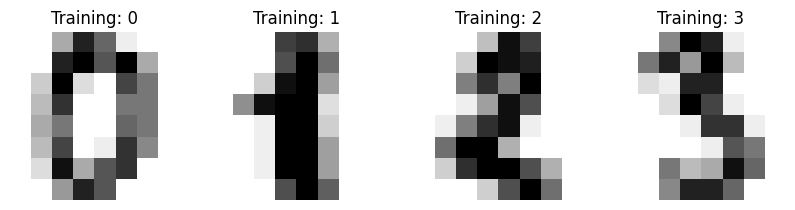

In [7]:
#loading digits dataset

from sklearn.datasets import load_digits

digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# selecting features and target
X = digits.data
Y = digits.target

# defining the model
model_svm = svm.SVC(gamma=0.001, probability=True)

# splting traning and testing data (80% train and 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=72
)

# fit the model
model_svm.fit(X_train, Y_train)

SVC(gamma=0.001, probability=True)

In [31]:
# Predictions
pred_svm = model_svm.predict(X_test)
y_prob = model_svm.predict_proba(X_test)

# Evaluations
bal_acc_svm = metrics.balanced_accuracy_score(Y_test, pred_svm)
roc_svm = metrics.roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro") 

print("Balanced Accuracy:", bal_acc_svm)
print("\nROC AUC Score:", roc_svm)

Balanced Accuracy: 0.9945906432748538

ROC AUC Score: 0.9999914266117969


Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


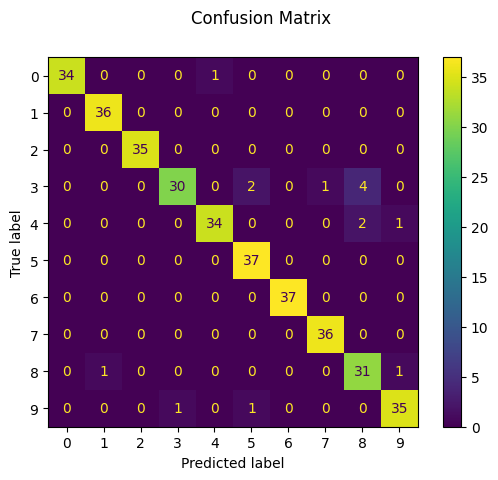

In [17]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred_svm)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100],  # Regularization strength
    "gamma": [0.01, 0.001, 0.0001],  # Kernel coefficient
    "kernel": ["rbf"]  # Using Radial Basis Function (RBF) kernel
}

# Perform GridSearch
grid_search_svm = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5, scoring="accuracy", verbose=1)
grid_search_svm.fit(X_train, Y_train)

# Best parameters
print(f"Best Parameters: {grid_search_svm.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [36]:
best_C = grid_search_svm.best_params_["C"] # Choosing the best C from after running the hyperparameter tuning
best_gamma = grid_search_svm.best_params_["gamma"]  # Choosing the best gamma from after running the hyperparameter tuning 

# Train optimized SVM model
optimal_model_svm = svm.SVC(C=best_C, gamma=best_gamma, kernel="rbf", probability=True)
optimal_model_svm.fit(X_train, Y_train)

# Predictions
optimal_pred_svm = optimal_model_svm.predict(X_test)

# Evaluate performance
accuracy_optimized = metrics.accuracy_score(Y_test, optimal_pred_svm)
print(f"Optimized SVM Accuracy: {accuracy_optimized:.4f}")

Optimized SVM Accuracy: 0.9944


In [39]:
acc = metrics.accuracy_score(Y_test, optimal_pred_svm)
bal_acc = metrics.balanced_accuracy_score(Y_test, optimal_pred_svm)

print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")

Accuracy: 0.9944
Balanced Accuracy: 0.9946
